Steps:
Acquire Dataset --> Data Exploration --> Data Preprocessing --> Train-Test split --> Model training

In [25]:
# Importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Loading the dataset
wine_df = pd.read_csv("WineQT.csv")

# Number of rows and columns
wine_df.shape

(1143, 13)

In [27]:
# First 5 rows
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [28]:
#Dropping last column (id - not needed)
wine_df = wine_df.drop(columns=['Id'])

# Checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Exploration and Visualization

In [29]:
# Data Exploration and Visualization
wine_df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


c:\Users\sruja\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


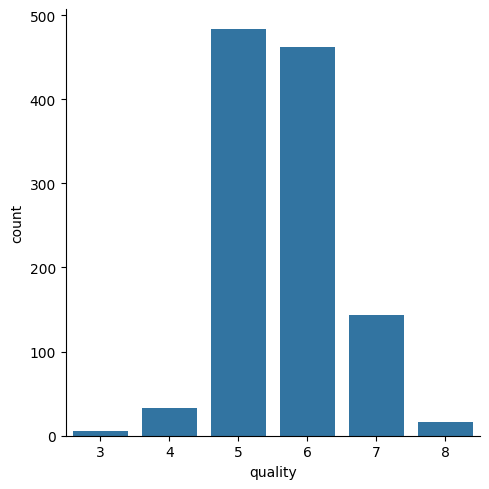

In [30]:
# To check the distribution of "Quality" column
# Number of values for each value of quality column
sns.catplot(x="quality", data = wine_df, kind = "count")

<Axes: xlabel='quality', ylabel='citric acid'>

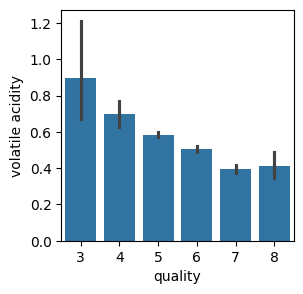

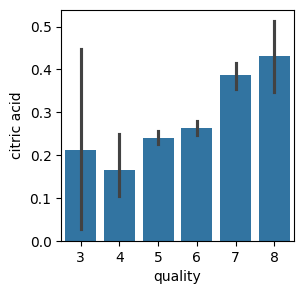

In [31]:
# To check which columns are correlated with the Quality column
# "Volatile acidity" vs "Quality"
plot = plt.figure(figsize=(3,3))
sns.barplot(x="quality", y="volatile acidity", data=wine_df)

# "citric acid" vs "Quality"
plot = plt.figure(figsize=(3,3))
sns.barplot(x="quality", y="citric acid", data=wine_df)

<Axes: >

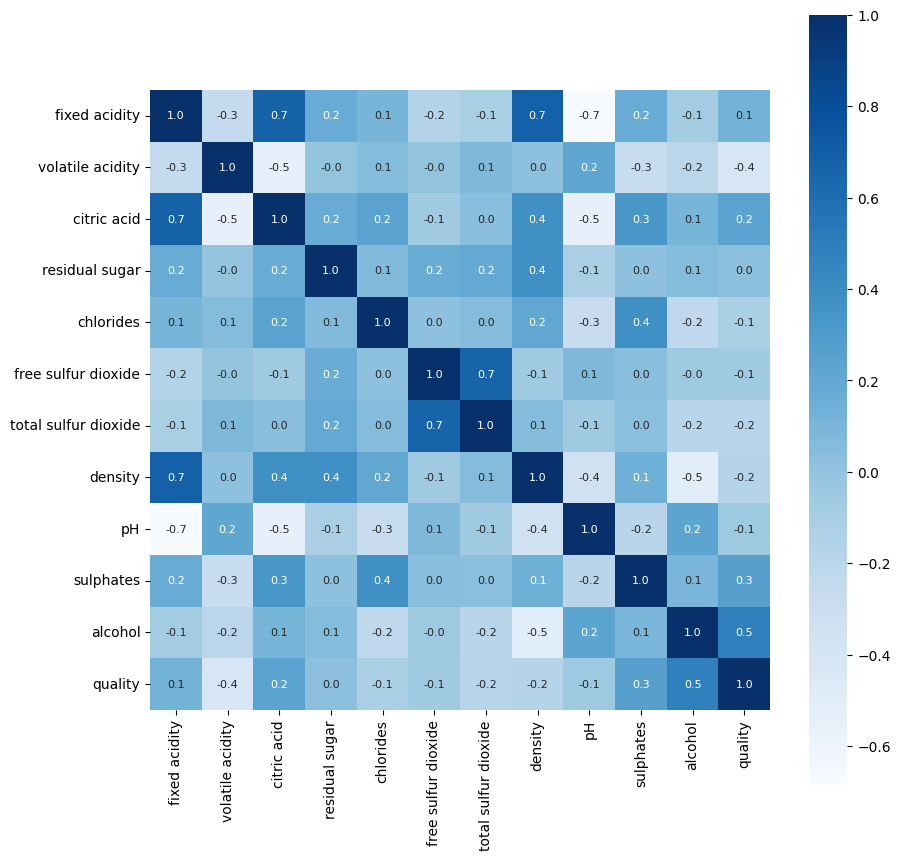

In [32]:
# Find the correlation of all columns, to know how the columns are related to each other
correlation = wine_df.corr()

# Heatmap of correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = "True", fmt = ".1f", annot = True, annot_kws={"size":8}, cmap = "Blues")

In [33]:
# separating the data and the lable before splitting and training
X = wine_df.drop("quality", axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [35]:
# Lable Binarization (We have values from 3 to 8 in quality column, So we are making values 3 to 6 = BAD and values 7 and 8 = GOOD)
Y = wine_df["quality"].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Train Test Split

In [39]:
# Train and Test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(Y.shape, y_train.shape, y_test.shape)

(1143,) (914,) (229,)


Model Training:

Random Forest Classifier

In [40]:
model = RandomForestClassifier()
model.fit(x_train, y_train, )

RandomForestClassifier()

Model Evaluation (Using Accuracy Score)

In [44]:
# Accuracy on test data
x_test_prediction = model.predict(x_test) # Values obtained from the prediction
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy : ", test_data_accuracy)

Accuracy :  0.9170305676855895


Building a Predective System

In [50]:
# input_data = (7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4)
input_data = (7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# print(input_data_as_numpy_array)

# Reshape the data as we are predicting the lable for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine


c:\Users\sruja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
